## Lab Session 

### Learning Objective:
- Working with data using python libaries.
- Data Visualization.
- Exploratory data analysis and data preprocessing.
- Building a Linear regression model to predict the tip amount based on different input features.

### About the dataset (Customer Tip Data)

#### Dataset Source: https://www.kaggle.com/datasets/ranjeetjain3/seaborn-tips-dataset

The dataset contains information about the 244 orders served at a restaurant in the United States. Each observation includes the factors related to the order like total bill, time, the total number of people in a group, gender of the person paying for the order and so on.

#### Attribute Information:

- **total_bill:** Total bill (cost of the meal), including tax, in US dollars
- **tip:** Tip in US dollars
- **sex:** Sex of person paying for the meal
- **smoker:** There is a smoker in a group or not
- **day:** Day on which the order is served
- **time:** Time of the order
- **size:** Size of the group

Food servers’ tips in restaurants may be influenced by many factors, including the nature of the restaurant, size of the party, and table locations in the restaurant. Restaurant managers need to know which factors matter when they assign tables to food servers. For the sake of staff morale, they usually want to avoid either the substance or the appearance of unfair
treatment of the servers, for whom tips (at least in restaurants in the UnitedStates) are a major component of pay.

### Import required libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import sklearn
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

### Load the dataset

In [2]:
df=pd.read_csv('tips.csv')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### 1. Make a list of categorical and numerical columns in the data.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


In [4]:
num=df.select_dtypes(exclude='O').columns.to_list()
cat=df.select_dtypes(include='O').columns.to_list()

In [5]:
print("numerical columns : ",num)

numerical columns :  ['total_bill', 'tip', 'size']


In [6]:
print("categorical columns :" ,cat)

categorical columns : ['sex', 'smoker', 'day', 'time']


### 2. Compute the average bill amount for each day.

In [7]:
df.groupby('day')['total_bill'].mean()

day
Fri     17.151579
Sat     20.441379
Sun     21.410000
Thur    17.682742
Name: total_bill, dtype: float64

In [8]:
df.groupby('day').agg(Total_Bill_Avg=('total_bill','mean'))

,Total_Bill_Avg
day,
Fri,17.151579
Sat,20.441379
Sun,21.410000
Thur,17.682742


### 3. Which gender is more generous in giving tips?

In [9]:
df.groupby('sex')['tip'].mean().idxmax()

'Male'

In [10]:
op = df.groupby('sex')['tip'].mean().idxmax()
print ('Gender which is more generous in giving tips :: ', op)

Gender which is more generous in giving tips ::  Male


### 4. According to the data, were there more customers for dinner or lunch?

In [11]:
df.groupby('time')['size'].count().idxmax()

'Dinner'

In [12]:
op = df.groupby('time')['size'].count().idxmax()
print('There are more customers for', op)

There are more customers for Dinner


### 5. Based on the statistical summary, comment on the variable 'tip'

In [13]:
df['tip'].describe()

count    244.000000
mean       2.998279
std        1.383638
min        1.000000
25%        2.000000
50%        2.900000
75%        3.562500
max       10.000000
Name: tip, dtype: float64

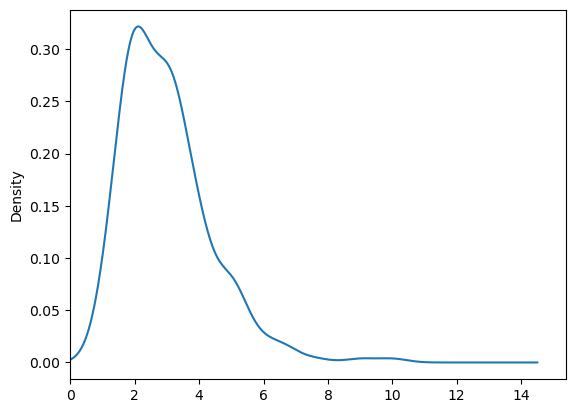

In [14]:
df['tip'].plot(kind='kde')
plt.xlim(0)
plt.show()

In [15]:
df['tip'].quantile([0.25,0.50,0.75])

0.25    2.0000
0.50    2.9000
0.75    3.5625
Name: tip, dtype: float64

##### Tip has a median of 2.9 with the range of middle half of the data being between 2 to 3.6.

### 6. Find the busiest day in terms of the orders?

In [16]:
df.day.value_counts().idxmax()

'Sat'

In [17]:
op = df.day.value_counts().idxmax()
print('Busiest day in terms of the orders :: ', op)

Busiest day in terms of the orders ::  Sat


### 7. Is the variable 'total_bill' skewed? If yes, identify the type of skewness. Support your answer with a plot

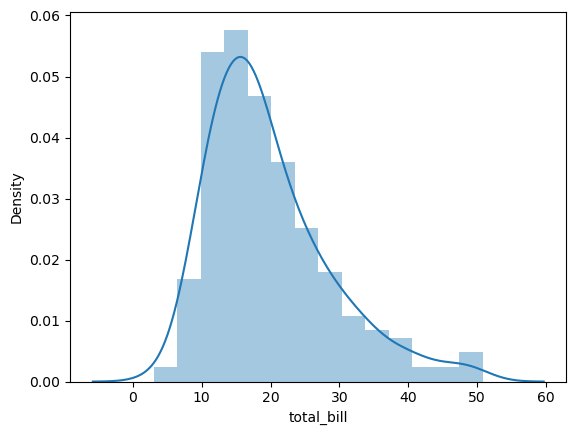

In [18]:
sns.distplot(df['total_bill'])
plt.show()

In [19]:
df['total_bill'].skew()

1.1332130376158205

#### Yes, Total Bill is skewed and it is righ-skewed. Sknewness > 1 indicates it is highly skewed.

### 8. Is the tip amount dependent on the total bill? Visualize the relationship with a appropriate plot and metric and write your findings.

In [20]:
df[['tip','total_bill']].corr()

,tip,total_bill
tip,1.000000,0.675734
total_bill,0.675734,1.000000


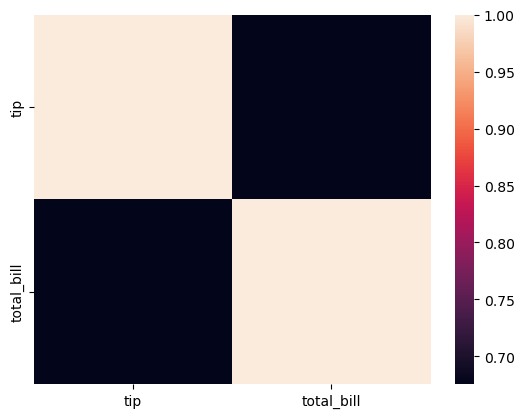

In [21]:
sns.heatmap(df[['tip','total_bill']].corr())
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

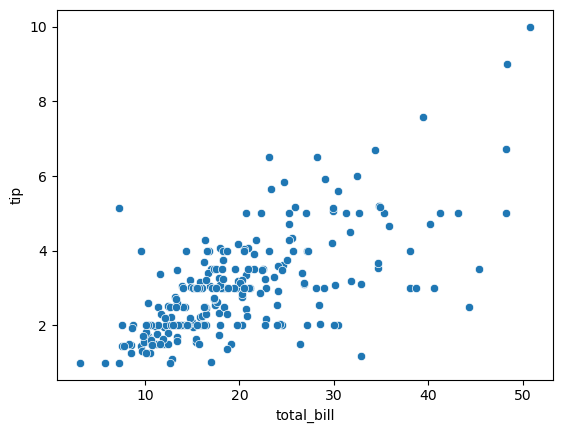

In [22]:
sns.scatterplot(x='total_bill',y='tip',data=df)
plt.show

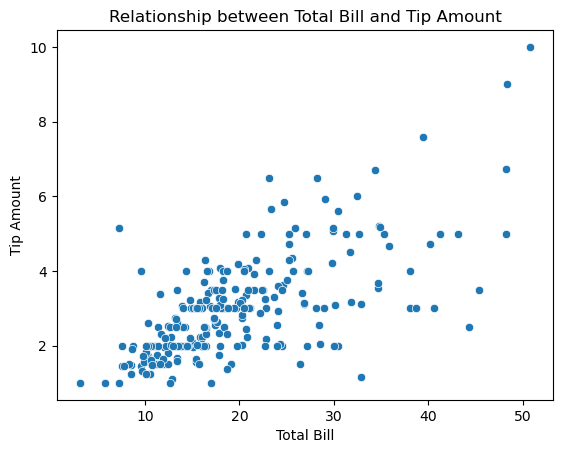

In [23]:
sns.scatterplot(x='total_bill', y='tip', data=df)
plt.title('Relationship between Total Bill and Tip Amount')
plt.xlabel('Total Bill')
plt.ylabel('Tip Amount')
plt.show()

#### Yes, the tip amount is dependent on total bill. From the plot we can say that as the total bill increases, the tip also increases.Tip has moderate positive correlation with the bill.

### 9. What is the percentage of males and females in the dataset? and display it in the plot

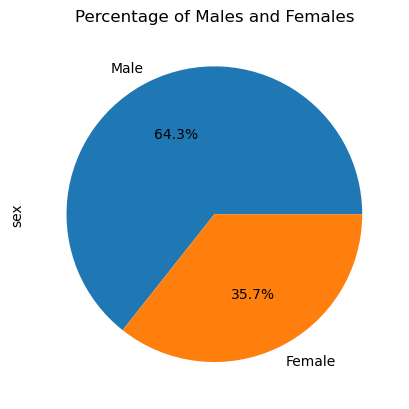

In [26]:
df['sex'].value_counts().plot(kind='pie',autopct='%1.1f%%')
plt.title('Percentage of Males and Females')
plt.show()

### 10. Compute the gender-wise count based on smoking habits and display it in the plot

In [27]:
df.groupby('sex')['smoker'].value_counts()

sex     smoker
Female  No        54
        Yes       33
Male    No        97
        Yes       60
Name: smoker, dtype: int64

<Axes: xlabel='smoker'>

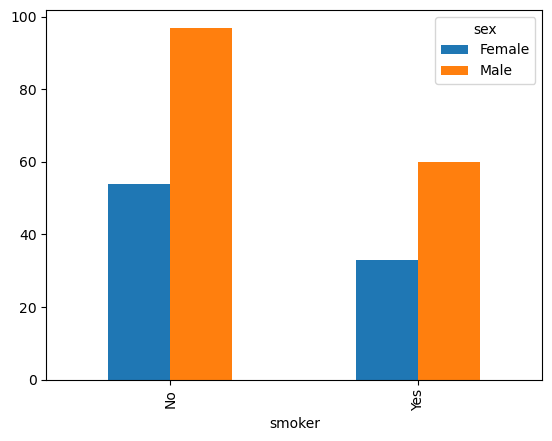

In [28]:
pd.crosstab(df['smoker'],df['sex']).plot(kind='bar')

In [29]:
df.pivot_table(index='sex', columns='smoker', values='tip')

smoker,No,Yes
sex,,
Female,2.773519,2.931515
Male,3.113402,3.051167


### 11. Compute the average tip amount given for different days and display it in the plot.

In [30]:
df.groupby('day')['tip'].mean()

day
Fri     2.734737
Sat     2.993103
Sun     3.255132
Thur    2.771452
Name: tip, dtype: float64

<Axes: xlabel='day', ylabel='tip'>

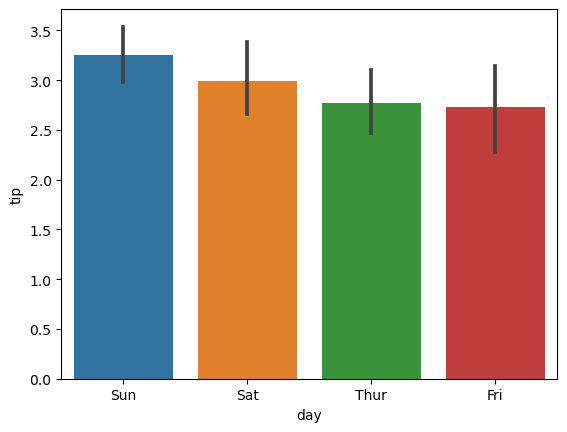

In [31]:
sns.barplot(x='day',y='tip', data=df)

### 12. Is the average bill amount dependent on the size of the group? Visualize the relationship using appropriate plot and write your findings.

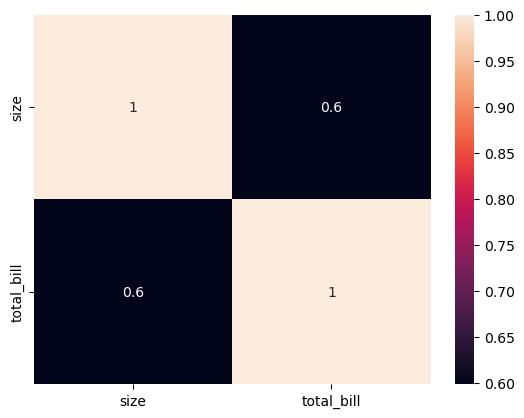

In [32]:
sns.heatmap(df[['size','total_bill']].corr(),annot=True)
plt.show()

<Axes: xlabel='size'>

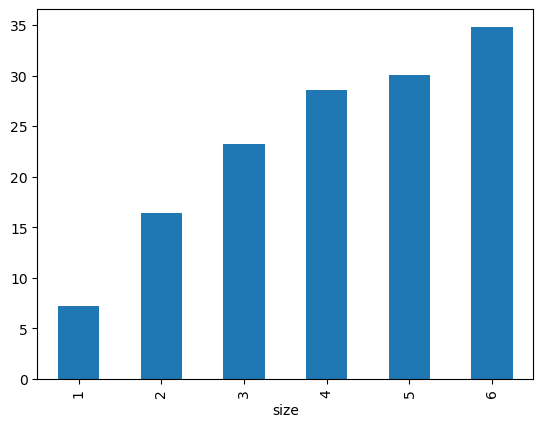

In [33]:
df.groupby('size')['total_bill'].mean().plot(kind='bar')

#### Yes,the average bill amount is dependent on size of group. As the size increases, the average bill amount also increases.

### 13. Plot a horizontal boxplot to compare the bill amount based on gender

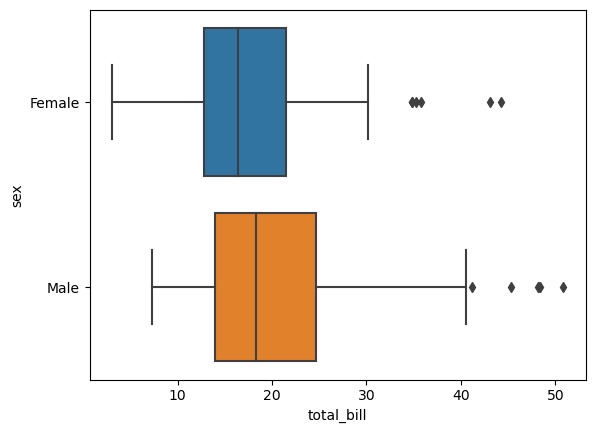

In [34]:
sns.boxplot(x='total_bill',y='sex',data=df)
plt.show()

### 14. Find the maximum bill amount for lunch and dinner on Saturday and Sunday

In [35]:
df.groupby(['time','day'])['total_bill'].max().loc['Dinner'][['Sat','Sun']]

day
Sat    50.81
Sun    48.17
Name: total_bill, dtype: float64

In [36]:
df.groupby(['time','day'])['total_bill'].max().loc['Lunch']
###as there is no sat sun for lunch

day
Fri     16.27
Thur    43.11
Name: total_bill, dtype: float64

### 15. Compute the percentage of missing values in the dataset.

In [38]:
df.isnull().sum()/len(df) * 100

total_bill    0.0
tip           0.0
sex           0.0
smoker        0.0
day           0.0
time          0.0
size          0.0
dtype: float64

### 16. Is there are any duplicate records in the dataset? If yes compute the count of the duplicate records and drop them.

In [39]:
len(df[df.duplicated()])

1

In [41]:
print("Duplicated Record ---")
df[df.duplicated()]

Duplicated Record ---


,total_bill,tip,sex,smoker,day,time,size
202,13.0,2.0,Female,Yes,Thur,Lunch,2


#### There is One duplicated record

In [42]:
df.drop_duplicates(inplace=True)

In [43]:
len(df[df.duplicated()])

0

In [44]:
print("Duplicated Record ---")
df[df.duplicated()]

Duplicated Record ---


,total_bill,tip,sex,smoker,day,time,size


#### now no duplicated record

### 17. Is there are any outliers present in the column 'total_bill'? If yes treat them with transformation approach, and plot a boxplot before and after the treatment

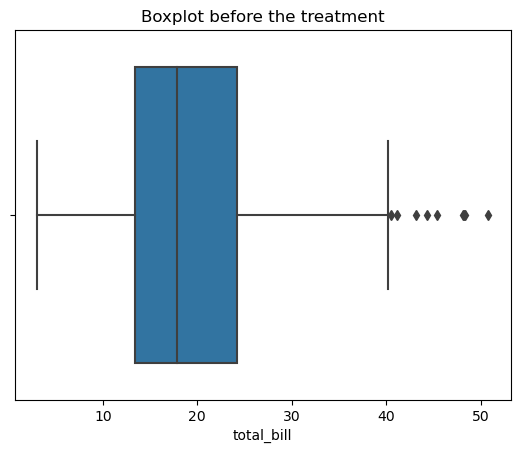

In [47]:
sns.boxplot(x = df['total_bill'])
plt.title('Boxplot before the treatment')
plt.show()

In [48]:
df['total_bill_trans']=np.log(df['total_bill'])

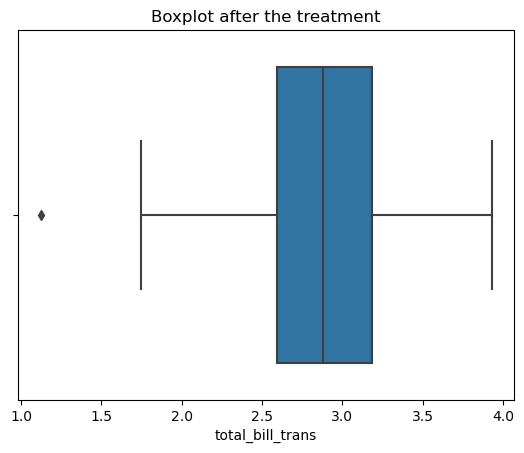

In [50]:
sns.boxplot(x = df['total_bill_trans'])
plt.title('Boxplot after the treatment')
plt.show()

### 18. Is there are any outliers present in the column 'tip'? If yes remove them using IQR techinque.

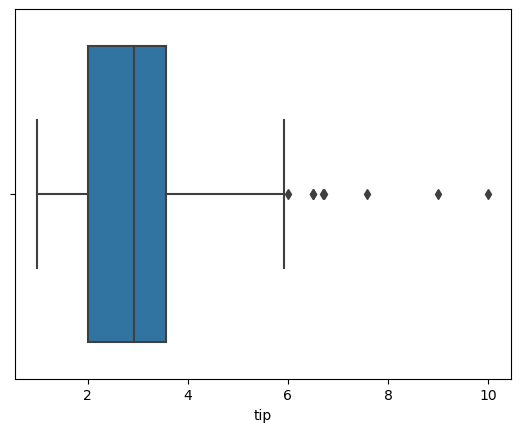

In [51]:
sns.boxplot(x = df['tip'])
plt.show()

#### Yes, outliers are present in the column 'tip'

In [52]:
# Using IQR techinque
# Calculate the IQR for the 'tip' column

Q1 = df['tip'].quantile(0.25)
Q3 = df['tip'].quantile(0.75)
IQR = Q3-Q1

# Define the lower and upper bounds for outliers
lower_whisker = Q1-(1.5*IQR)
upper_whisker = Q3+(1.5*IQR)

In [53]:
print('Q1 = ', Q1)
print('Q3 = ', Q3)
print('lower_whisker = ', lower_whisker)
print('upper_whisker = ', upper_whisker)

Q1 =  2.0
Q3 =  3.575
lower_whisker =  -0.36250000000000027
upper_whisker =  5.9375


In [54]:
# Identify outliers
df_out = df.loc[(df['tip']<upper_whisker) & (df['tip']>lower_whisker)] #rows without outlier

In [55]:
# Display the DataFrame without outliers
print(df_out)

     total_bill   tip     sex smoker   day    time  size  total_bill_trans
0         16.99  1.01  Female     No   Sun  Dinner     2          2.832625
1         10.34  1.66    Male     No   Sun  Dinner     3          2.336020
2         21.01  3.50    Male     No   Sun  Dinner     3          3.044999
3         23.68  3.31    Male     No   Sun  Dinner     2          3.164631
4         24.59  3.61  Female     No   Sun  Dinner     4          3.202340
..          ...   ...     ...    ...   ...     ...   ...               ...
239       29.03  5.92    Male     No   Sat  Dinner     3          3.368330
240       27.18  2.00  Female    Yes   Sat  Dinner     2          3.302481
241       22.67  2.00    Male    Yes   Sat  Dinner     2          3.121042
242       17.82  1.75    Male     No   Sat  Dinner     2          2.880321
243       18.78  3.00  Female     No  Thur  Dinner     2          2.932792

[235 rows x 8 columns]


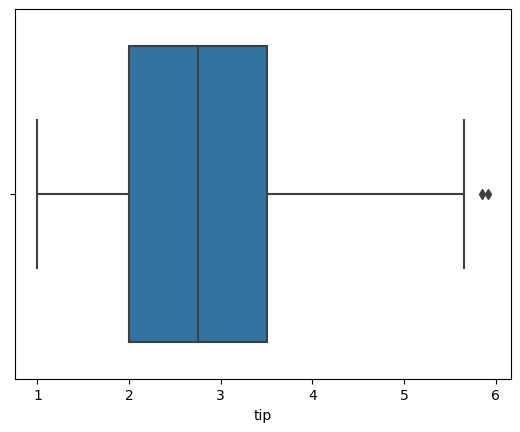

In [56]:
# Display the DataFrame without outliers
sns.boxplot(x= df_out['tip'])
plt.show()

### 19. Encode the categorical columns in the dataset and print the random 5 samples from the dataframe.

In [57]:
df = pd.get_dummies(df,drop_first=True)
df.sample(5)

,total_bill,tip,size,total_bill_trans,sex_Male,smoker_Yes,day_Sat,day_Sun,day_Thur,time_Lunch
16,10.33,1.67,3,2.335052,0,0,0,1,0,0
144,16.43,2.30,2,2.799109,0,0,0,0,1,1
84,15.98,2.03,2,2.771338,1,0,0,0,1,1
89,21.16,3.00,2,3.052113,1,0,0,0,1,1
14,14.83,3.02,2,2.696652,0,0,0,1,0,0


### 20. Check the range of the column 'total_bill' and transform the values such that the range will be 1.

In [58]:
tb_max = df['total_bill'].max()
tb_min = df['total_bill'].min()
range = tb_max-tb_min
print(range)

47.74


In [59]:
#initialize minmaxscaler
mm = MinMaxScaler()
print(mm)

MinMaxScaler()


In [60]:
df['total_bill_mm'] = mm.fit_transform(df[['total_bill']])

In [64]:
tb_mm_max = df['total_bill_mm'].max()
tb_mm_min = df['total_bill_mm'].min()
range_ = tb_mm_max-tb_mm_min
print('The range is :: ', range_)

The range is ::  0.9999999999999999


### 21. Load the dataset again by giving the name of the dataframe as "tips_df"
- i) Encode the categorical variables.
- ii) Store the target column (i.e.tip) in the y variable and the rest of the columns in the X variable

In [65]:
tips_df = pd.read_csv('tips.csv')
tips_df.head(2)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3


i) Encode the categorical variables.

In [66]:
tips_df = pd.get_dummies(tips_df,drop_first=True)
tips_df.head(2)

,total_bill,tip,size,sex_Male,smoker_Yes,day_Sat,day_Sun,day_Thur,time_Lunch
0,16.99,1.01,2,0,0,0,1,0,0
1,10.34,1.66,3,1,0,0,1,0,0


ii) Store the target column (i.e.tip) in the y variable and the rest of the columns in the X variable

In [67]:
x = tips_df.drop('tip',axis=1)
y = tips_df['tip']

### 22. Split the dataset into two parts (i.e. 70% train and 30% test), and Standardize the columns "total_bill" and "Size" using the mim_max scaling approach

In [69]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.30)
print(x_train.shape,x_test.shape)
print(y_train.shape,y_test.shape)

(170, 8) (74, 8)
(170,) (74,)


In [70]:
mn = MinMaxScaler()

In [71]:
x_train.iloc[:,:2] = mn.fit_transform(x_train.iloc[:,:2])
x_test.iloc[:,:2] = mn.transform(x_test.iloc[:,:2])

### 23. Train a linear regression model using the training data and print the r_squared value of the prediction on the test data.

In [72]:
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [73]:
#making predictions
pred = lr.predict(x_test)

In [74]:
#omputing r2_score
print('r2-score test:', r2_score(y_test,pred))

r2-score test: 0.48016942143678965


### Happy Learning:)